In [34]:
## mount google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Python libraries for Data Visualization

*   Numpy https://numpy.org/doc/stable/
*   pandas https://pandas.pydata.org/docs/
*   matplotlib https://matplotlib.org/stable/gallery/index.html
*   seaborn https://seaborn.pydata.org/examples/index.html





In [35]:
# importing python Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# 2.Dataset 

**Life Ladder dataset**  
 - The dataset can be obtained from [World Happiness Report](https://worldhappiness.report/ed/2022/#appendices-and-data)

<table>
  <tr>
    <td><img src = "https://drive.google.com/uc?id=1DLfLRebnXEFZ58EAfS6XFp8jGidHISmu" height = 300 width = 800></td>
    <td><img src = "https://drive.google.com/uc?id=12M580ium53o1Xy6vwGDZeZGzJBQAL_N6" height = 300 width = 1000></td>
  <tr>
</table>

World Happiness Report use data from the Gallup World Poll surveys. They are based on answers to the main life evaluation question asked in the poll. It asks respondents to think of a ladder, with the best possible life for them being a 10 and the worst possible life being a 0.This is called the Cantril ladder.

▶ Analyze the Life Ladder data.

▶ What can we learn from Data analysis?

*  Life Ladder Score (Life Satisfaction) trend by year and countries
*  Factors affecting life ladder score


---

0. get dataset

**Life Ladder dataset**  
 - The dataset can be obtained from [World Happiness Report](https://worldhappiness.report/ed/2022/#appendices-and-data)


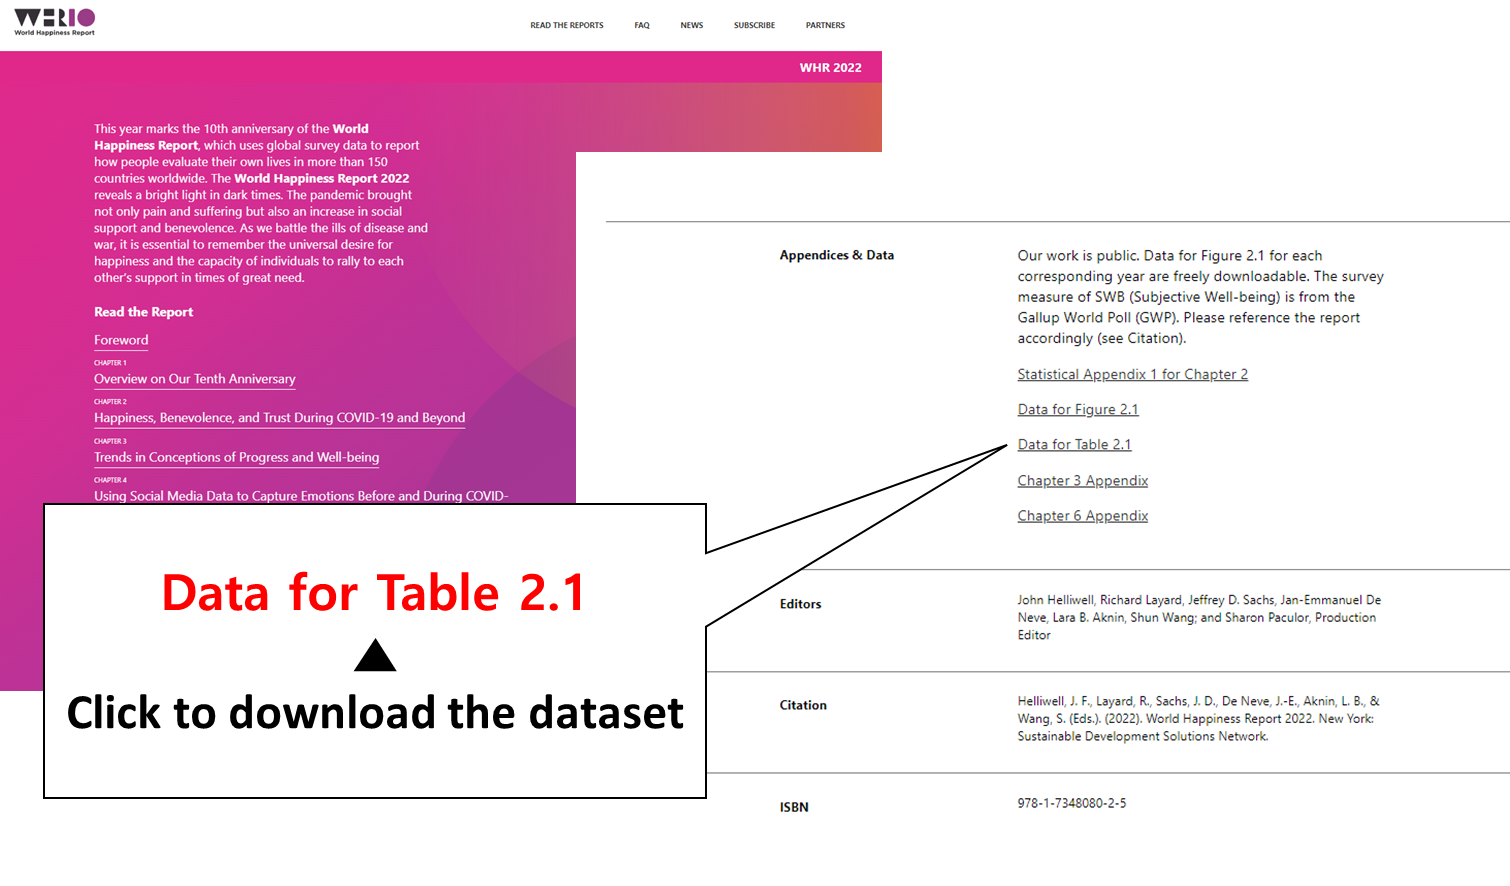

1.  Read Excel data files from your Google Drive
   
        - You can access files in Drive by mounting your Google Drive

* Put the downloaded Excel file into Google Corlab Notebook.

* file_path : 수업에 사용하던 data 폴더

In [36]:
## load data file
file_path = '/content/drive/MyDrive/Colab Notebooks/python_visualization/data/DataForTable2.1.xls'
life =pd.read_excel(file_path)
life.head(2)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545


2. Process data in the form you need and save it to your Google drive

In [37]:
# Extract required column (We need 'country name' to 'Perceptions of corruption'.)
life_cut = life.loc[:, :'Perceptions of corruption']
life_cut.head(2)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035


In [38]:
life_cut.tail(2)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523
2088,Zimbabwe,2021,3.154578,8.153248,0.685151,54.049999,0.667636,-0.109439,0.756945


In [39]:
# Get column names as a list and save them in life_cut_col
life_cut_col = life_cut.columns.to_list() 
print(life_cut_col)

['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


In [40]:
# We will change the name of the column.
# New Column Name ▼
new_col_name_list = ['Country','year','Life Ladder','GDP per capita','Social support', 
               'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
# Create a new data frame and copy existing columns with a new name there.
life = pd.DataFrame()
life[new_col_name_list] = life_cut[life_cut_col]    
life.head()

,Country,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620


In [41]:
# Save preprocessed data to your Google drive as csv
life.to_csv('/content/drive/MyDrive/Colab Notebooks/python_visualization/data/Life_Ladder.csv')

3. Load preprocessed Life_Ladder.csv data as csv

In [42]:
## load data file
life = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/python_visualization/data/Life_Ladder.csv')

# 3.Pandas Data Exploration Functions

In [43]:
# the first 5 rows
life.head() 

,Unnamed: 0,Country,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686
1,1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035
2,2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766
3,3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109
4,4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620


In [44]:
# Remove Index Column using iloc
life = life.iloc[:, 1:]
life.head()

,Country,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620


In [45]:
# the last 5 rows
life.tail()  

,Country,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523
2088,Zimbabwe,2021,3.154578,8.153248,0.685151,54.049999,0.667636,-0.109439,0.756945


In [46]:
# dimensionality of the DataFrame (number of rows and columns)
life.shape  

(2089, 9)

In [47]:
# summary of a DataFrame
life.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           2089 non-null   object 
 1   year                              2089 non-null   int64  
 2   Life Ladder                       2089 non-null   float64
 3   GDP per capita                    2062 non-null   float64
 4   Social support                    2076 non-null   float64
 5   Healthy life expectancy at birth  2031 non-null   float64
 6   Freedom to make life choices      2057 non-null   float64
 7   Generosity                        2009 non-null   float64
 8   Perceptions of corruption         1976 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 147.0+ KB


In [48]:
# descriptive statistics
life.describe()  

,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,2089.000000,2089.000000,2062.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.180326,0.745462,0.000102,0.746474
std,4.455614,1.115567,1.143520,0.118935,6.948546,0.140751,0.161082,0.186136
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198
25%,2010.000000,4.651972,8.473547,0.747664,58.965000,0.651689,-0.113172,0.689840
50%,2014.000000,5.405246,9.463269,0.834770,64.980003,0.767357,-0.023366,0.801339
75%,2017.000000,6.294282,10.347656,0.904682,68.362499,0.857677,0.090584,0.870789
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276


# 4.Data Visualization

## (Example 1) What are the Top 5 Asian countries with the highest life ladder score in 2021?

In [49]:
# install python pakage 
!pip install country_converter

# importing country_converter library
import country_converter as coco

# add continent code 
life['continent']=coco.convert(names=list(life['Country']), to='continent')
life.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Country,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,Asia
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,Asia
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,Asia
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,Asia
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,Asia


<ipython-input-50-f48996dc6e59>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=life5, x="Country", y="Life Ladder", color='blue', ci=None)


Text(0, 0.5, 'Life Ladder Score')

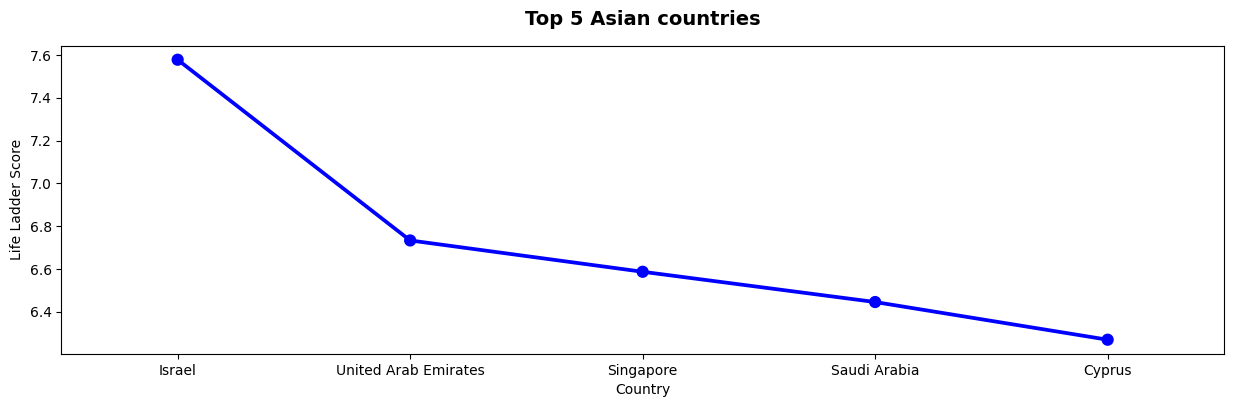

In [50]:
# Create new dataframe
life5 = life.sort_values("Life Ladder", ascending=False).query('continent == "Asia" and year == 2021').head(5)

# Set font style
font_style = {
    'fontsize': 14,
    'fontweight': 'bold'      #  {‘normal’,‘bold’, 'heavy’,‘light’,‘ultrabold’,‘ultralight’} 
}

# Set size of figure
plt.figure(figsize=(15, 4))  

# Set titles for the figure 
plt.title('Top 5 Asian countries', fontdict=font_style, loc='center', pad=15)  

# draw pointplot
sns.pointplot(data=life5, x="Country", y="Life Ladder", color='blue', ci=None) 

# naming the y axis
plt.ylabel("Life Ladder Score")

## (Exercise 1) What are the Top 10 countries with the highest life ladder score in 2021?

<ipython-input-51-5903ed020d39>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=life_top10, x="Country", y="Life Ladder", color='blue', ci=None)


Text(0, 0.5, 'Life Ladder Score')

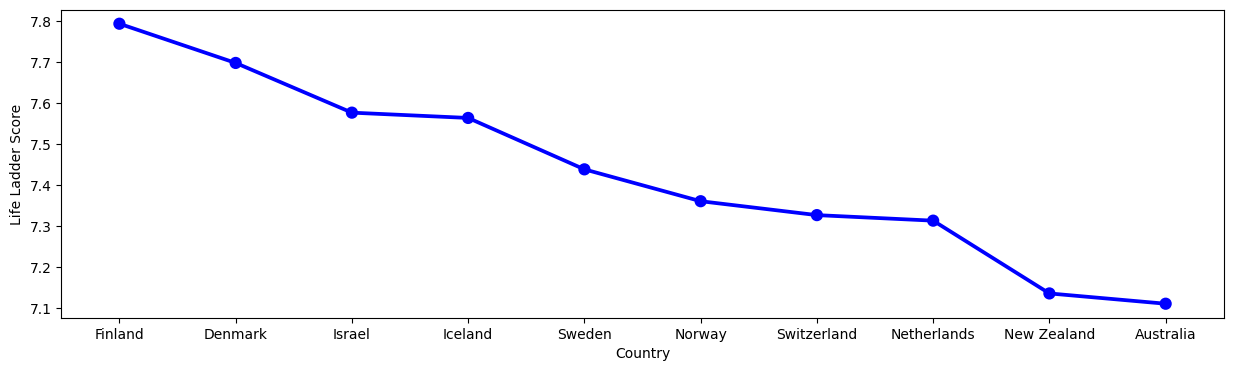

In [51]:
life_top10 = life.sort_values("Life Ladder", ascending=False).query('year == 2021').head(10)

plt.figure(figsize=(15, 4))  
sns.pointplot(data=life_top10, x="Country", y="Life Ladder", color='blue', ci=None) 
plt.ylabel("Life Ladder Score")

## (Exercise2) Create the line plot that displays ladder score by year & continents 

<ipython-input-52-ec38cc5b2393>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=life, x=life["year"], y=life["Life Ladder"], hue="continent", ci=None)


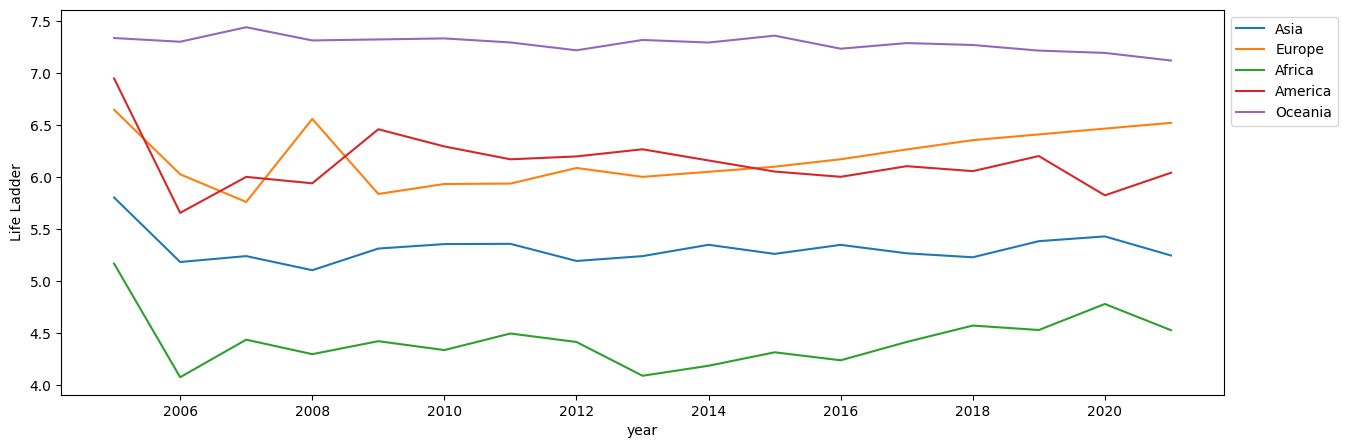

In [52]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=life, x=life["year"], y=life["Life Ladder"], hue="continent", ci=None)   
plt.legend(bbox_to_anchor=(1, 1)) 

## (Exercise 3) Create the bar plot that displays ladder score by continents 

<Axes: xlabel='continent', ylabel='Life Ladder'>

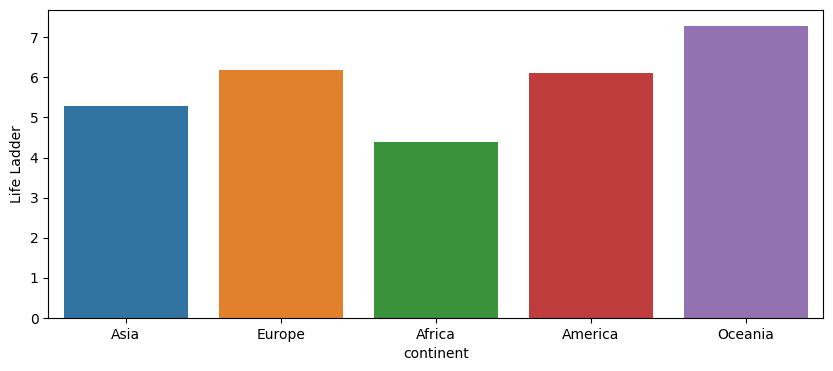

In [53]:
plt.figure(figsize=(10,4))
sns.barplot(data=life,x="continent", y="Life Ladder" , errwidth=0)

## (Exercise 4) Create the relplot that displays ladder score of specific countries by year

◼ Tips
* relplot : If kind = "line", a line plot is drawn.
  > relplot (kind: 'scatter'; default or 'line')
* seaborn > Tutorial > Overview of seaborn plotting functions 
  > https://seaborn.pydata.org/tutorial/function_overview.html
* seaborn > API > seaborn.relplot
  > https://seaborn.pydata.org/generated/seaborn.relplot.html

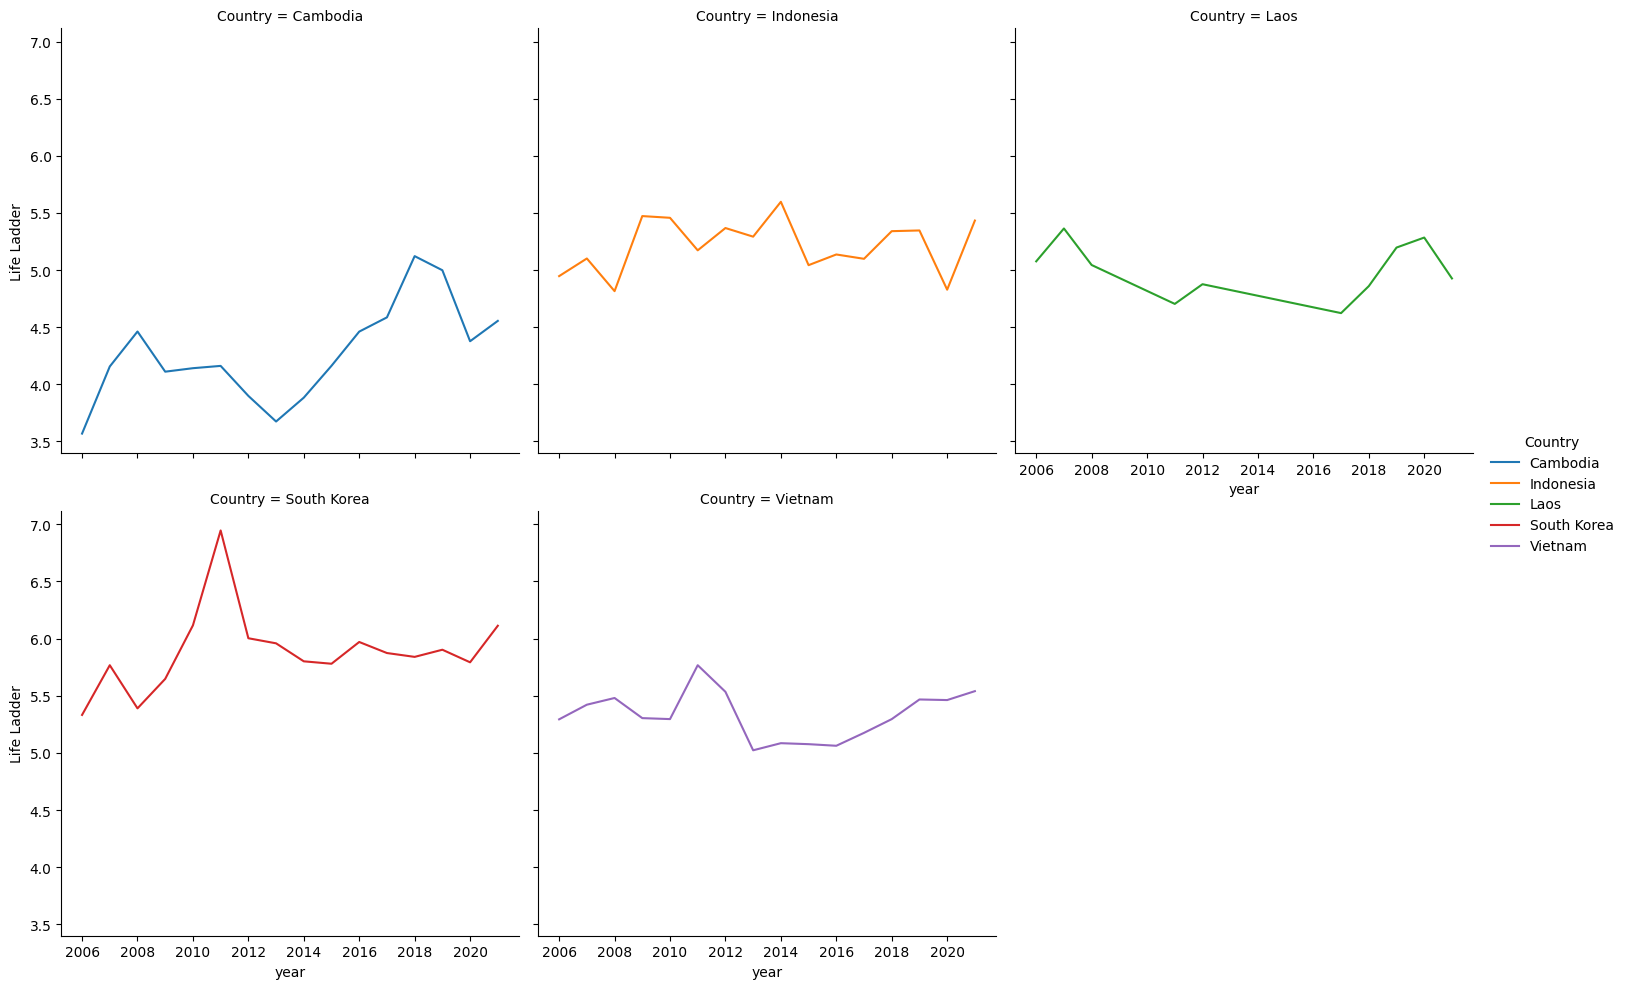

In [54]:
life_specific = life[life['Country'].isin (['Cambodia','Indonesia','Laos','South Korea','Vietnam' ])]
sns.relplot(data=life_specific
            , x="year"
            , y="Life Ladder"
            , kind="line"
            , hue="Country"
            , col="Country"
            , col_wrap=3
            )

## (Exercise 5) Is there correlation between ladder score and economy of the countries (GDP per capita)?


<Axes: xlabel='Life Ladder', ylabel='GDP per capita'>

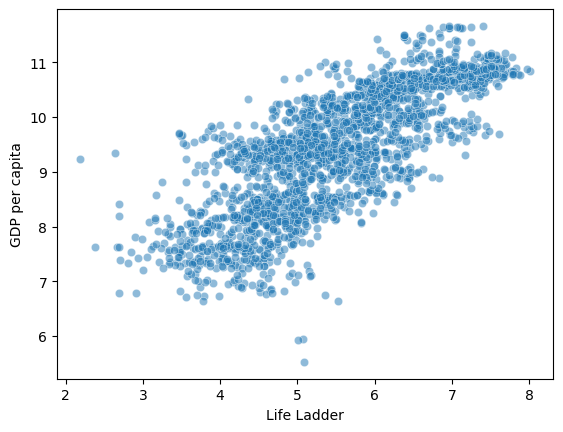

In [55]:
sns.scatterplot(data=life, x="Life Ladder" , y="GDP per capita", alpha=.5)

<Axes: xlabel='Life Ladder', ylabel='GDP per capita'>

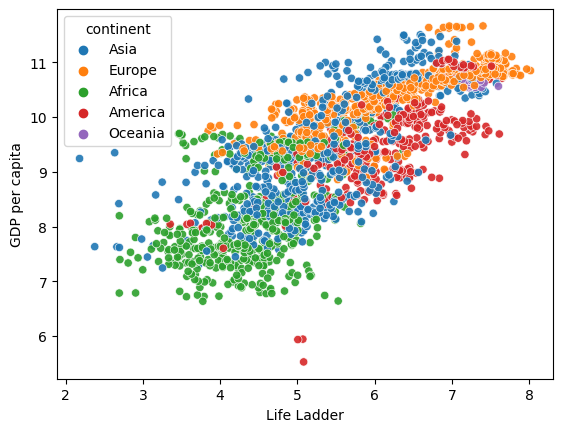

In [56]:
sns.scatterplot(data=life
              , x="Life Ladder" 
              , y="GDP per capita"
              , hue="continent"
              , alpha=.9)

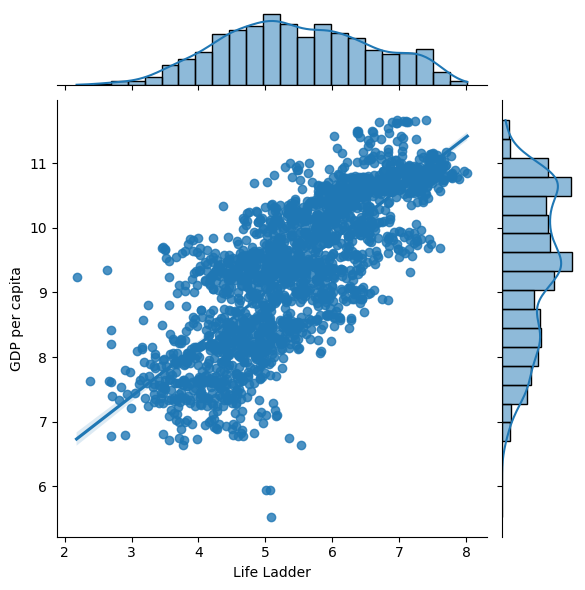

In [57]:
sns.jointplot(x="Life Ladder", y="GDP per capita", data=life, kind="reg")

## (Exercise 6) Create the pairplot that displays relationship of ladder score to the other factors

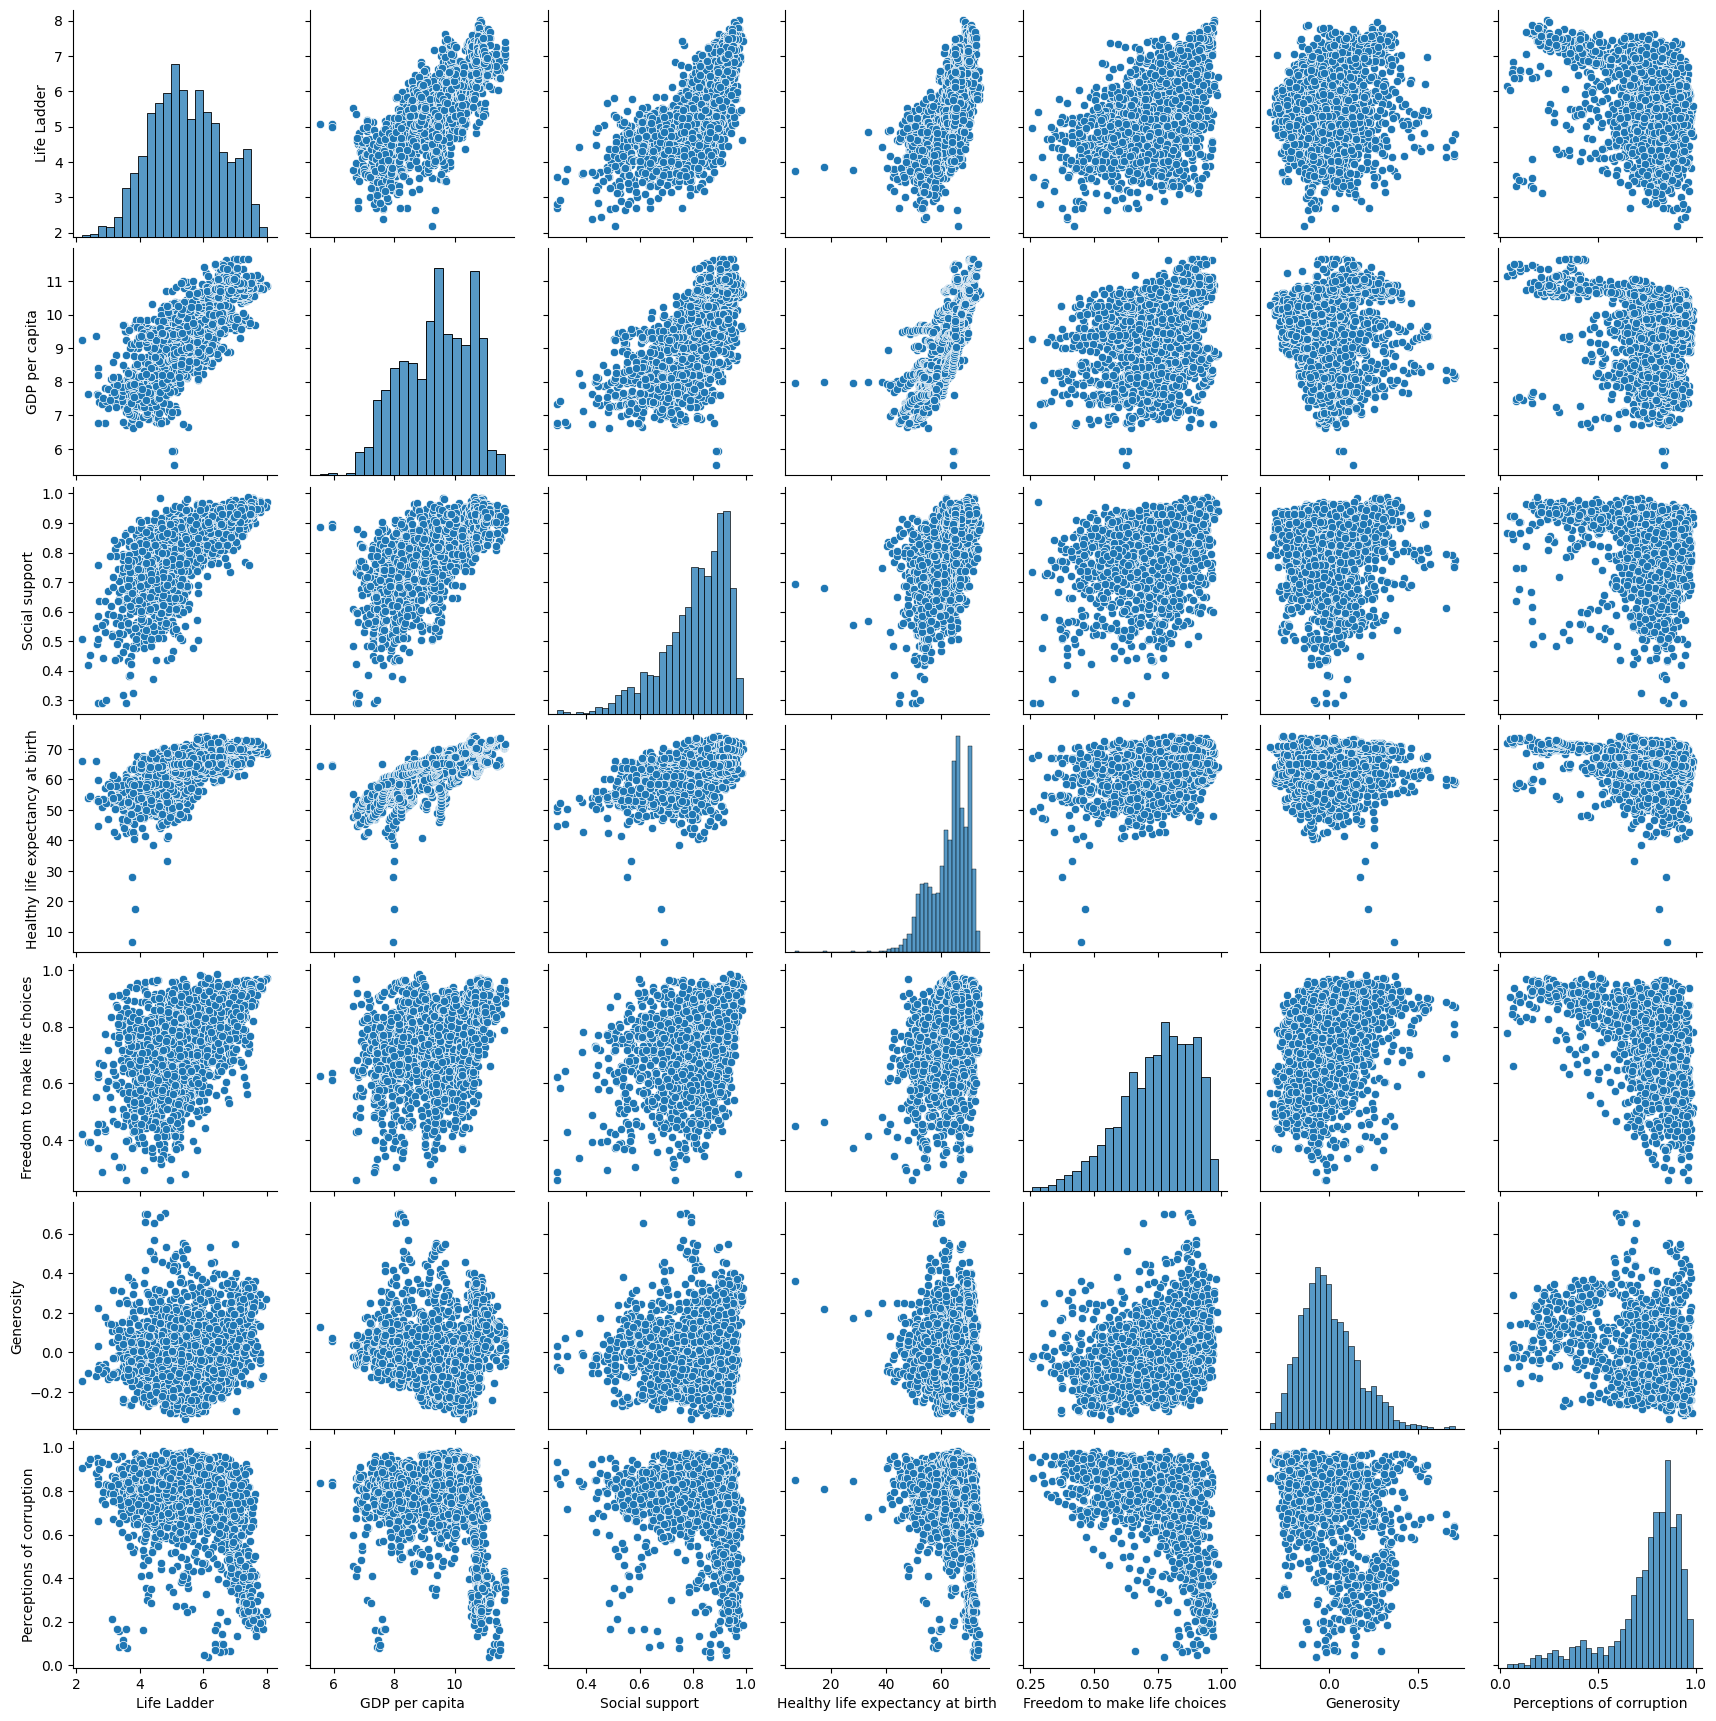

In [58]:
sns.pairplot(life[['Life Ladder'
              ,'GDP per capita'
              ,'Social support'
              ,'Healthy life expectancy at birth'
              ,'Freedom to make life choices'
              ,'Generosity', 'Perceptions of corruption']])

## (Exercise 7) Create the heatmap that displays correlation of factors

In [59]:
data_corr =life[['Life Ladder', 'GDP per capita', 'Social support', 'Healthy life expectancy at birth',  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()            
data_corr

,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Life Ladder,1.000000,0.782158,0.713881,0.713795,0.531316,0.187568,-0.429346
GDP per capita,0.782158,1.000000,0.681699,0.810385,0.361541,-0.000836,-0.343813
Social support,0.713881,0.681699,1.000000,0.597580,0.409119,0.069759,-0.222571
Healthy life expectancy at birth,0.713795,0.810385,0.597580,1.000000,0.368588,0.014261,-0.294089
Freedom to make life choices,0.531316,0.361541,0.409119,0.368588,1.000000,0.328375,-0.480590
Generosity,0.187568,-0.000836,0.069759,0.014261,0.328375,1.000000,-0.281094
Perceptions of corruption,-0.429346,-0.343813,-0.222571,-0.294089,-0.480590,-0.281094,1.000000


<Axes: >

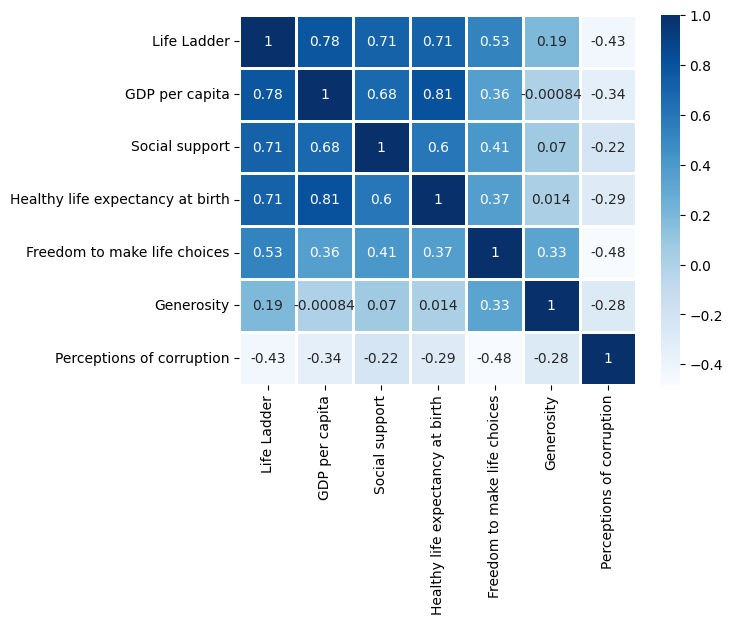

In [60]:
sns.heatmap(data_corr, cmap="Blues", linewidths=2.0, linecolor='white', annot=True)

## (Exercise 8) Create the hist plot and kde plot that displays distribution of ladder score by continents

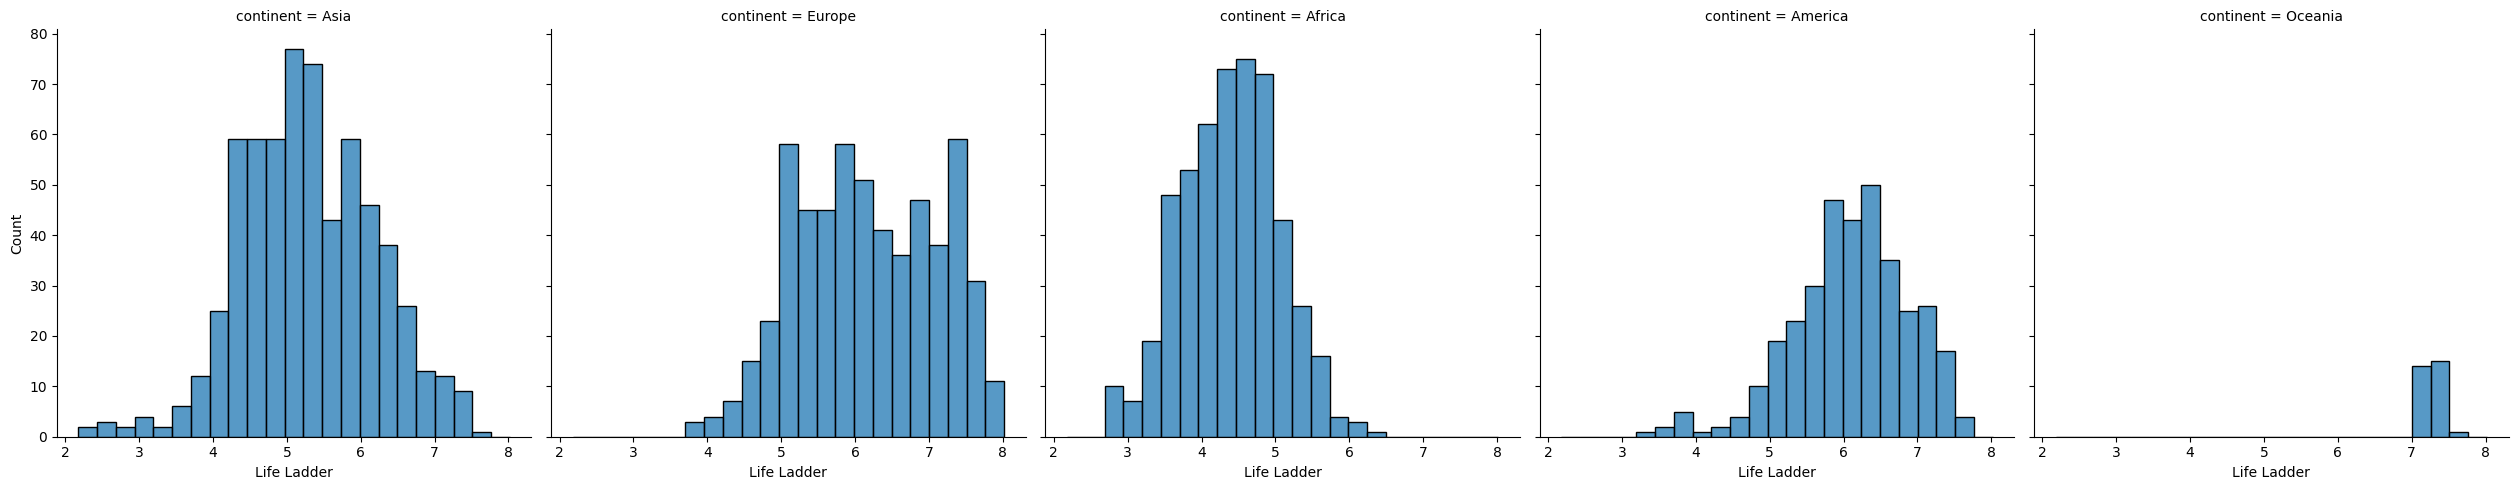

In [61]:
sns.displot(data=life, x='Life Ladder', col= 'continent', col_wrap=10)

<Axes: xlabel='Life Ladder', ylabel='Density'>

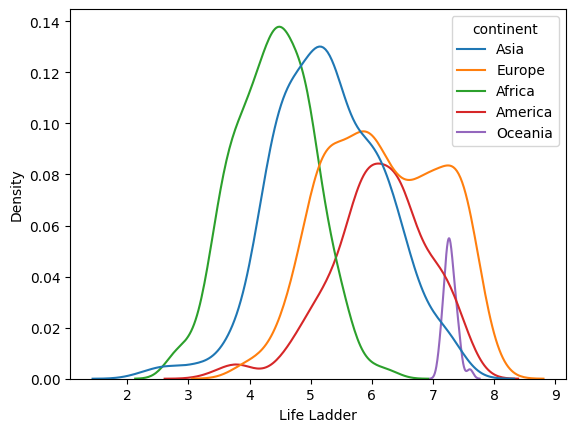

In [62]:
sns.kdeplot(data=life, x= 'Life Ladder', hue='continent')